# EXPLORATORY DATA ANALYSIS OF TELECOMMUNICATION CHURN

Churn is the measure of how many customers stop using a product or service. Telecommunication churn is the measure of how many customers stop using the product or service of a telecommunication company.

Customer churn is a major problem and one of the most important concerns for large companies. Due to the direct effect on the revenues of the companies, especially in the telecom field, companies are seeking to develop means to predict potential customer to churn. Companies are working hard to survive in this competitive market depending on multiple strategies.  Therefore, finding factors that increase customer churn is important to take necessary actions to reduce this churn. Churn can be avoided by studying the past history of customers 

The aim of this project is to carry out a complete EDA process to determine factors that increase customer churn. Also, I will draw some insights from data visualization and analysis so that I could get the factors which  affect the churn of the customer. 



In [122]:
#to import the python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the datasets
data = pd.read_csv(r'C:\Users\Olowoselu\Desktop\Kehinde\telecom_churn.csv')
data.head()



,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Each row represents a customer, each column contains customer’s attributes 

The he datasets consists of 3333 customers with 20 features

The “Churn” column is our target.


In [3]:
data.shape

#The datasets consists of 3333 customers with 20 features


(3333, 20)

In [123]:
#The column represent the features
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn', 'Total_calls'],
      dtype='object')

# DESCRIPTION OF THE FEATURES


State: State Abbreviation

Account length: How long the client has been with the companyLength of the account
Area code: The phone number prefix

International plan: International plan suscribtion (yes/no)

Voice mail plan: Yes indicates subcription to voice mail plan and No indicates not subscribed

Number vmail messages: The number of voice mail messages 

Total day minutes: Total duration of daytime calls

Total day calls:The total number of daytime calls

Total day charge:The total charge for daytime calls

Total eve minutes: Total duration of evening calls

Total eve calls:The total number of evening calls 

Total eve charge:The total charge for evening calls

Total night minutes: Total duration of nighttime calls

Total night calls:The total number of nighttime calls

Total night charge:The total charge for nighttime calls 

Total intl minutes:The duration of international calls

Total intl calls:The total number of international calls made

Total intl charge:The total charge for international calls

Customer service calls:The number of customer service calls made by customers

Churn:This is our target variable. True meansthe company lost the customer and False means the  customer was retained

In [53]:
#The types of data in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


In [51]:
#To check missing values
data.isnull().sum()

#No missing values

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
Total_calls               0
dtype: int64

There is no missing value in the datasets

In [5]:
#To check the unique state in the datasets
state = data.State.unique()

print(f'There are {len(state)} in this datasets')
print(state)

There are 51 in this datasets
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']


In [6]:
#To check on various statistical characteristics of numerical features
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
print(data['Voice mail plan'].unique())
print(data['International plan'].unique())
print(data['Churn'].unique())

['Yes' 'No']
['No' 'Yes']
[False  True]


In [8]:
data.State.unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [9]:
data.State.unique().shape
#The entry was gotten from user in 51 states

(51,)

# Count the Number of entry in each state

In [137]:
data.State.value_counts().head(10)


WV    106
MN     84
NY     83
AL     80
OH     78
OR     78
WI     78
VA     77
WY     77
CT     74
Name: State, dtype: int64

# What state has the highest number of entry?

In [136]:
data.State.value_counts(ascending = False).head(10)
#West Virgina has the highest number of entry

WV    106
MN     84
NY     83
AL     80
OH     78
OR     78
WI     78
VA     77
WY     77
CT     74
Name: State, dtype: int64

West Virgina has the highest number of entry

# What state has the lowest number of entry?

In [135]:
data.State.value_counts(ascending = True).head(10)

#California has the lowest number of entry

CA    34
IA    44
PA    45
LA    51
AK    52
TN    53
HI    53
GA    54
DC    54
AR    55
Name: State, dtype: int64

California has the lowest number of entry

# How many customers left the service of the telecommunication company?

In [13]:
data.Churn.value_counts()

#483 out of 3333 churn the telecommunication service

False    2850
True      483
Name: Churn, dtype: int64

483 out of 3333 churn the telecommunication service

# Plot of the the Churn rate

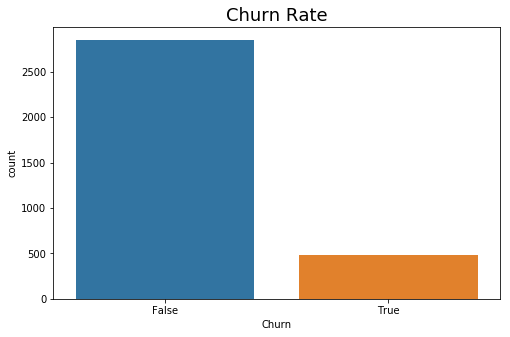

In [128]:
plt.figure(figsize = (8,5))
sns.countplot(data.Churn)
plt.title('Churn Rate', fontsize = 18)
plt.show()

# Pie Chart showing the Churn rate

   churn  count
0  False   2850
1   True    483


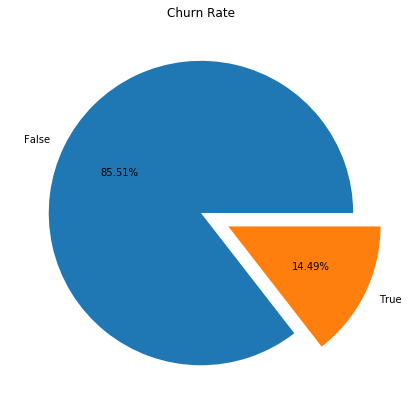

In [81]:
plt.figure(figsize=(7,7))
churn = data.Churn.value_counts().reset_index()
churn.rename(columns = {'index': 'churn', 'Churn': 'count'}, inplace = True)
print(churn)

plt.pie(churn['count'], labels = churn['churn'],explode = (0,0.2), autopct = '%0.2f%%')
plt.title('Churn Rate')
plt.show()

#85.51% of the Customers were still committed to the telecommunication service

From the Pie Chart:

The blue colour represents the customers that are still committed to the telecommuincation company.

The orange colour denotes the customers that left the company.

From the diagram, about 15% of the customers left the comapny while approximately 86% were retained by the company.

The number of retained customers are about 6 times the number of customer that left the comapny

# Show the Churn rate for each States

In [16]:
pd.crosstab(data['Churn'], data['State'])

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Churn,,,,,,,,,,,,,,,,,,,,,
False,49,72,44,60,25,57,62,49,52,55,...,52,48,54,62,72,65,52,71,96,68
True,3,8,11,4,9,9,12,5,9,8,...,8,5,18,10,5,8,14,7,10,9


# Graph representing the count of each States

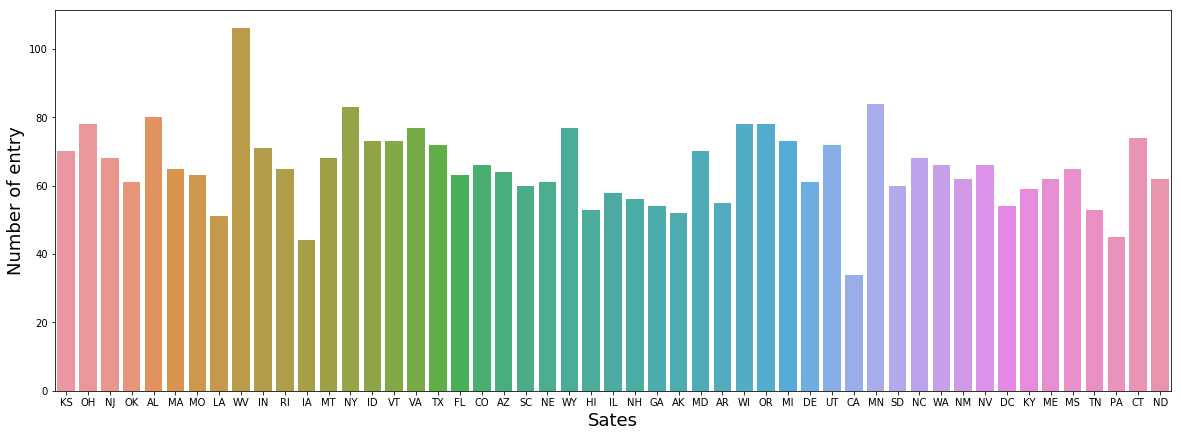

In [17]:
plt.figure(figsize = (20, 7))
sns.countplot(data.State)
plt.xlabel('Sates', fontsize = 18)
plt.ylabel('Number of entry', fontsize = 18)
plt.show()

#California has the lowest number of entry while West Virgina has the highest

California has the lowest number of entry while West Virgina has the highest

# Graph showing the distribution of each states with their Churn rate

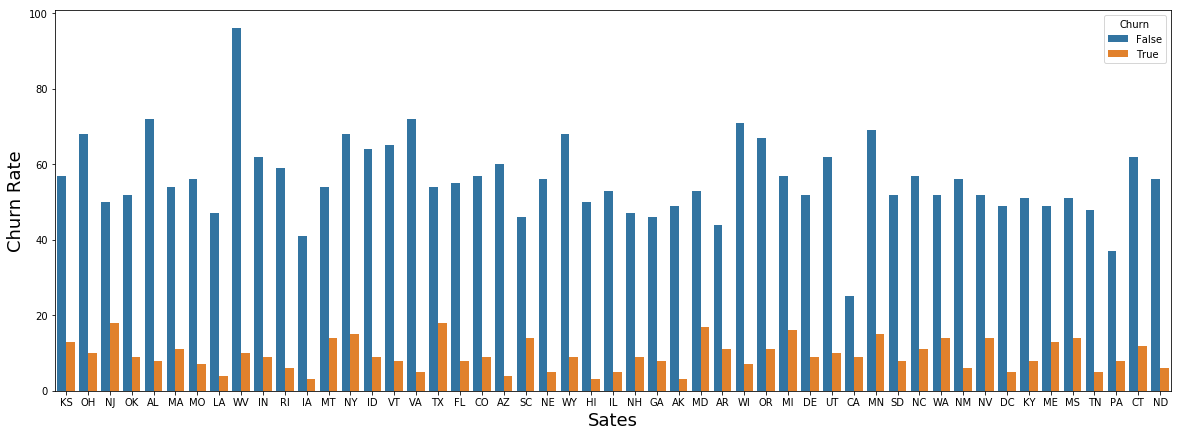

In [70]:
plt.figure(figsize = (20, 7))
sns.countplot(data.State, hue = data.Churn)
plt.xlabel('Sates', fontsize = 18)
plt.ylabel('Churn Rate', fontsize = 18)
plt.title('Churn rate in each States')
plt.show()


#From the graph,West Virgina has the lowest Churn rate while New Jersey and Texas has the highest Churn rate

The graph denotes the Churn rate in each States

from the graph,West Virgina has the highest number of retained customers Churn rate while New Jersey and Texas has the highest Churn rate

In [134]:
data.pivot_table(index = 'State', values = 'Total day calls', columns = 'Churn', aggfunc = 'max').head(10)

Churn,False,True
State,,
AK,129,118
AL,139,121
AR,143,145
AZ,163,133
CA,150,129
CO,145,129
CT,137,136
DC,145,147
DE,140,134


# The number of users on international plan

In [20]:
data['International plan'].value_counts()

#323 out of 3333 enrolled for international plan

No     3010
Yes     323
Name: International plan, dtype: int64

323 out of 3333 enrolled for international plan while 3010 did not apply for International calls

# Graph showing the number of users on international plan

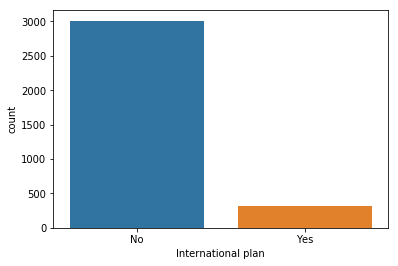

In [21]:
sns.countplot(data['International plan'])
plt.show()

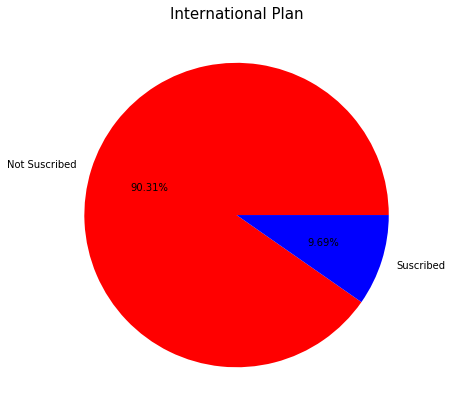

In [85]:
plt.figure(figsize=(7,7))
int_plan = data['International plan'].value_counts()
plt.pie(int_plan, colors = ('red', 'blue'), labels = ['Not Suscribed', 'Suscribed'], autopct = '%0.2f%%')
plt.title('International Plan', fontsize = 15)

plt.show()

From the diagram above, the blue color represents the customers who suscribed for international plan while red represent the number of customers who are not on international plan

out of the 3333 customers, about 10% suscribed for international plan while 90% did not suscribed

it's obvious that there is low suscription for international plan 

# Show how International plan affect the Churn rate

In [22]:
pd.crosstab(data['Churn'], data['International plan'])

#out of 2850 committed users, 2664 enrolled for international plan while 186 did not enroll for international plan

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


Out of 2850 retained users, 2664 enrolled for international plan while 186 did not enroll for international plan

Also, among the 483 customers that churned the company, only 137 suscribed for international plan while 346 did npot suscribe

In [23]:
pd.crosstab(data['International plan'], data['Churn'])

#Out of the 323 customers on international plan, 137 Churned the telecommunication service

Churn,False,True
International plan,,
No,2664,346
Yes,186,137


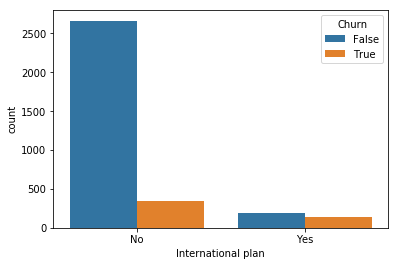

In [24]:
sns.countplot(data['International plan'], hue = data['Churn'])
plt.show()

#When international plan is enabled the churn rate is higher than when it is not enabled

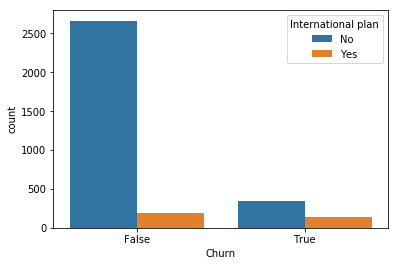

In [25]:
sns.countplot(data['Churn'], hue = data['International plan'])
plt.show()



When international plan is enabled the churn rate is higher than when it is not enabled

In [131]:
int_ch= pd.crosstab(data['International plan'], data['Churn'])


int_ch["churn_percentage"]=int_ch.apply(lambda x:(x[1]/(x[0]+x[1]))*100, axis=1)
int_ch

Churn,False,True,churn_percentage
International plan,,,
No,2664,346,11.495017
Yes,186,137,42.414861


Out of the 323 customers on international plan, 137 Churned the telecommunication service, while 186 customers were retained.

Out of 3010 customers who are not on international plan, only 346 churned the company while 2664 were retained

When international plan is not enabled, the churn rate  in quite low compare to when  international rate is enabled

Out of the few customers who suscribed for international plan, about 42% churned the company while only 11% of customers that are not on international plan churnrd the company.

in Conclusion, it can be derived from the analysis that most customers churned the comapny due to high cost of international calls, while customers who nare not on international plan were committed to the company.

In [26]:
#data.pivot_table(index = 'State', columns = 'International plan', aggfunc = {'International plan': 'count'})
pd.crosstab(data['State'], data['International plan'])



International plan,No,Yes
State,,
AK,48,4
AL,72,8
AR,47,8
AZ,61,3
CA,30,4
CO,62,4
CT,66,8
DC,49,5
DE,51,10


# Distribution of the States and International plan

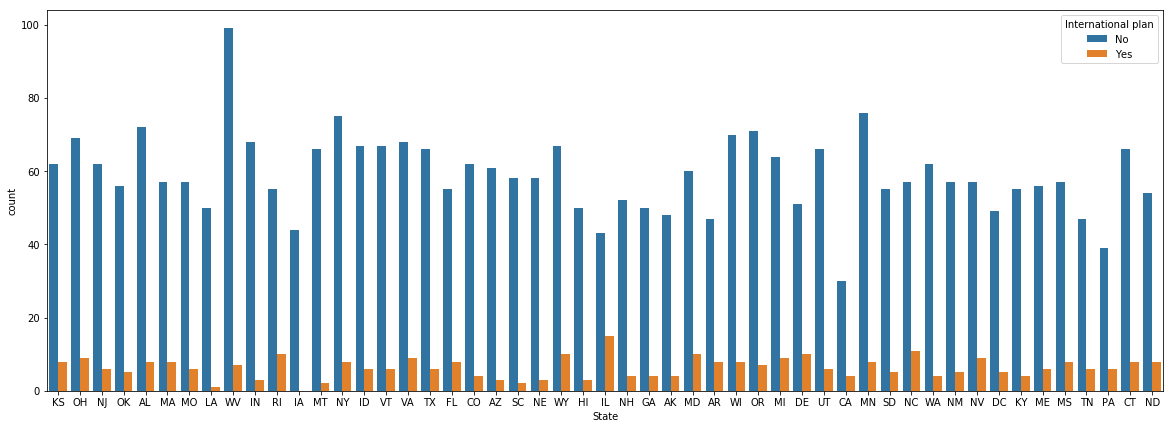

In [27]:
plt.figure(figsize = (20, 7))
sns.countplot(data.State, hue = data['International plan'])
plt.show()

#From the table users from Illinos has the highest  number of international suscription(15 suscribers)
#While West Virgina has the highest number of suscribers without international plan
#No Users from Lowa suscribes for international plan
#One user from Louisiana suscribed for International plan
# 30 Users from California has the lowest number of suscribers(30) withiut international plan

From the table and diagram above, users from Illinos has the highest  number of international suscription(15 suscribers)

While West Virgina has the highest number of suscribers without international plan

No Users from Lowa suscribes for international plan

One user from Louisiana suscribed for International plan

30 Users from California has the lowest number of suscribers(30) withiut international plan

# Area Codes

In [28]:
data['Area code'].unique()

#There are 3 unique area codes in the datasets

array([415, 408, 510], dtype=int64)

# Which of the area code has the highest and lowest numbers of entry?

In [29]:
data['Area code'].value_counts()

#Users with the area code - 415 have the highest number of entry(1655)
#While 408 has the lowest(838)

415    1655
510     840
408     838
Name: Area code, dtype: int64

Users with the area code - 415 have the highest number of entry(1655)
While 408 has the lowest(838)

# Distribution of Area codes and international plan

In [30]:

data.pivot_table(index = 'Area code', columns = 'International plan', aggfunc = {'International plan': 'count'})

International plan     
International plan                 No  Yes
Area code                                 
408                               767   71
415                              1505  150
510                               738  102

### The lowest and highest international plan suscribers
### The Area code 415 has the highest number of international plan
### 408 has the lowest number of international plan suscribers
### 415 has the highest number of international plan without international plan
### 510 has the lowest number of suscribers without international plan

In [31]:
pd.crosstab(data['Churn'], data['International plan'], normalize = True)

International plan,No,Yes
Churn,,
False,0.79928,0.055806
True,0.10381,0.041104


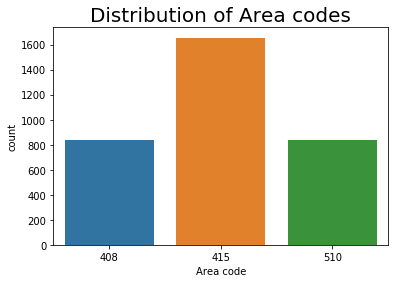

In [32]:
sns.countplot(data['Area code'])
plt.title('Distribution of Area codes', fontsize = 20)
plt.show()

# Distribution of customer service calls

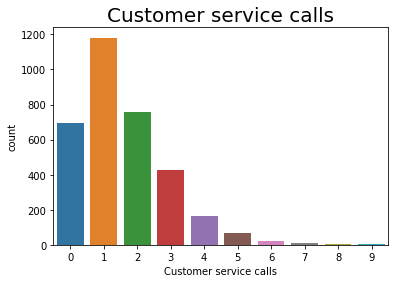

In [33]:
sns.countplot(data['Customer service calls'])
plt.title('Customer service calls', fontsize = 20)
plt.show()


From the diagram above, it can be concluded that majority of the customers resolved their problems in maximum 2-3 calls

In [34]:
data['Customer service calls'].value_counts()



1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

Its obvious that majority of the users were able to solve their problem with just a call

While 697 customers did not encounter any problem leading to calling the customer care


In [132]:
data["Customer service calls"].describe()

count    3333.000000
mean        1.562856
std         1.315491
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: Customer service calls, dtype: float64

# Distribution of customer service calls and Churn rate

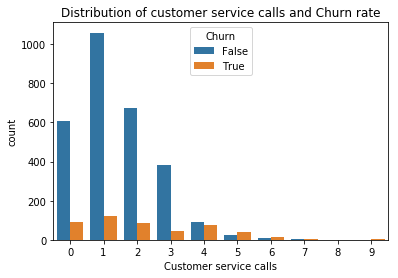

In [35]:
sns.countplot(data['Customer service calls'], hue = data['Churn'])
plt.title('Distribution of customer service calls and Churn rate')
plt.show()

#The churn ratesignificantly  increases after 4 or more calls to customer service

The churn rate significantly  increases after 4 or more calls to customer service

majortity of the customers who churned the telecommunication service were not able to resolve their problem after 4 calls, they had to keep calling the for help.

Eventually, these customers churned the telecommunication service because they nwere not satisfied with the solution provided by the customer service after 4 calls

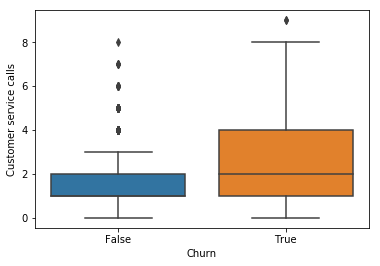

In [36]:
sns.boxplot(x = data['Churn'], y = data['Customer service calls'])
plt.show()



The boxplot gave a significant difference in the churn rate.

its now obvious that the Churn rate increases as the number of customer service calls increase.

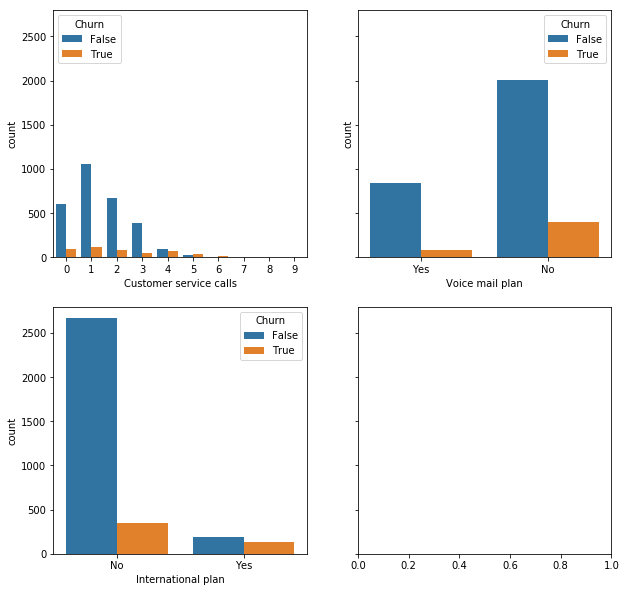

In [37]:
fig, axes = plt.subplots(2,2, sharey = True, figsize = (10,10))
sns.countplot(data['Customer service calls'], hue = data['Churn'], ax = axes[0,0])
sns.countplot(data['Voice mail plan'], hue = data['Churn'], ax = axes[0,1])
sns.countplot(data['International plan'], hue = data['Churn'], ax = axes[1,0])




In [38]:
pd.crosstab(data['Churn'], data['Voice mail plan'])

Voice mail plan,No,Yes
Churn,,
False,2008,842
True,403,80


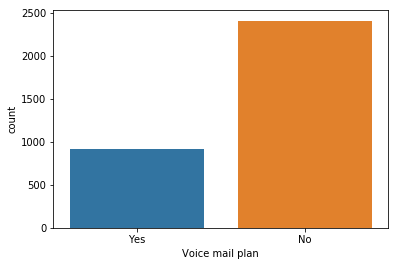

In [39]:
sns.countplot(data['Voice mail plan'])
plt.show()

In [91]:
data.head(2)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total_calls
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.7,1,False,303
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.7,1,False,332


# Average Calls made in each area

In [92]:
#Average calls made in each Area
data.pivot_table(["Total day calls", "Total eve calls", "Total night calls", 'Total intl calls'], ["Area code"], aggfunc="mean")

,Total day calls,Total eve calls,Total intl calls,Total night calls
Area code,,,,
408,100.496420,99.788783,4.426014,99.039379
415,100.576435,100.503927,4.561934,100.398187
510,100.097619,99.671429,4.370238,100.601190


In [41]:
data.pivot_table('Total intl charge', ['State'], aggfunc = 'sum').sort_values(by = 'Total intl charge',ascending = True).head()

,Total intl charge
State,
CA,90.63
IA,114.95
PA,127.47
LA,128.53
AK,140.68


In [42]:
data.pivot_table('Total intl charge', ['State'], aggfunc = 'sum').sort_values(by = 'Total intl charge',ascending = False).head()

,Total intl charge
State,
WV,288.19
MN,236.97
NY,223.78
AL,222.32
VA,220.55


# The average calls made in each State

In [93]:
data.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls', 'Total intl calls'], ['State'], aggfunc = 'mean')

,Total day calls,Total eve calls,Total intl calls,Total night calls
State,,,,
AK,95.269231,96.576923,4.807692,97.346154
AL,99.100000,98.462500,4.700000,98.612500
AR,102.145455,97.836364,4.690909,99.054545
AZ,100.109375,102.406250,4.859375,99.984375
CA,104.500000,103.088235,4.441176,99.205882
CO,95.121212,98.166667,4.106061,97.060606
CT,98.432432,99.121622,4.108108,102.283784
DC,100.166667,101.981481,3.907407,97.666667
DE,98.639344,97.360656,4.295082,101.213115


In [102]:
day_rate = data['Total day charge'].mean()/data['Total day minutes'].mean()
eve_rate = data['Total eve charge'].mean()/data['Total eve minutes'].mean()
night_rate = data['Total night charge'].mean()/data['Total night minutes'].mean()
intl_rate = data['Total intl charge'].mean()/data['Total intl minutes'].mean()

print('Day rate is: ' + str(day_rate))
print('Evening rate is: ' + str(eve_rate))
print('Night rate is: ' + str(night_rate))
print('International rate is: ' + str(intl_rate))

Day rate is: 0.1700030073913066
Evening rate is: 0.08500104871485774
Night rate is: 0.04500041448440013
International rate is: 0.2700500279887098


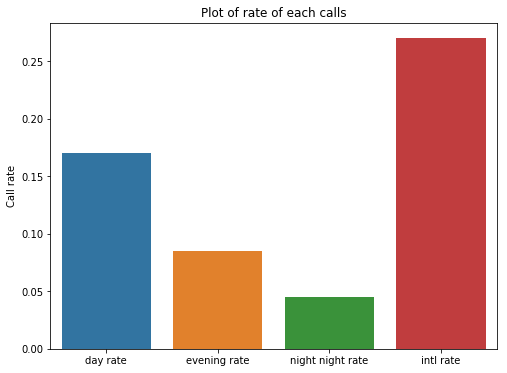

In [107]:
plt.figure(figsize = (8,6))
sns.barplot(x=["day rate","evening rate","night night rate","intl rate"],y=[day_rate,eve_rate,night_rate,intl_rate])
plt.title('Plot of rate of each calls')
plt.ylabel('Call rate')
plt.show()

Night call has the lowest charge rate (0.045 per minute)

International calls have the highest call charge rate (0.27 per minutes) while night calls have the lowest charge rate (0.045 per minute)

This explains the reason for the high rate of churn by customers who subscribed to the international call.
The international call is quite  is expensive  compare to other calls.
The Customers tend to be unsatified with the hight rate the company charge them for international calls, so majority of them churn the company

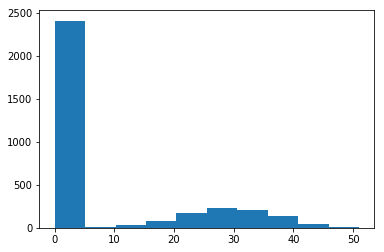

In [45]:
plt.hist(data['Number vmail messages'])
plt.show()

In [133]:
data['Total_calls'] = data['Total day calls'] + data['Total eve calls'] + data['Total night calls'] + data['Total intl calls']
data.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total_calls
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,303
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,332
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,333
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,255
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,359
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,...,18.75,203.9,118,9.18,6.3,6,1.70,0,False,323
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,...,29.62,212.6,118,9.57,7.5,7,2.03,3,False,321
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,...,8.76,211.8,96,9.53,7.1,6,1.92,0,False,275
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,...,29.89,215.8,90,9.71,8.7,4,2.35,1,False,271
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,...,18.87,326.4,97,14.69,11.2,5,3.02,0,False,297


# Average Total calls

In [48]:
#Average total calls 

data['Total_calls'].mean()

305.1371137113711